In [ ]:
# Victor Z and Leo Gonzalez
# UW-Madison, 2023
# compare alternatives using mean-variance

import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

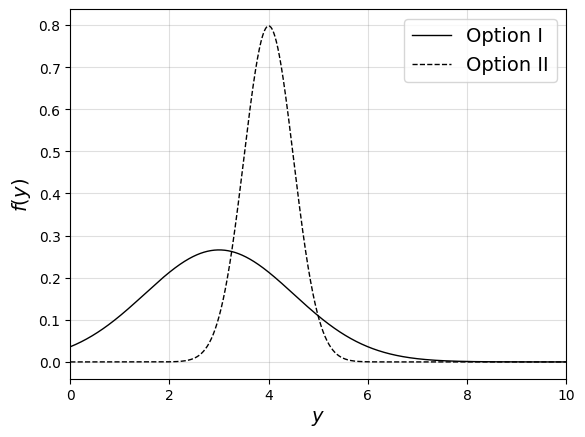

In [ ]:
x = np.linspace(0, 10, 1000);

plt.figure()
plt.plot(x, norm.pdf(x, loc = 3, scale = 1.5), 'k-', linewidth = 1, label = 'Option I')
plt.plot(x, norm.pdf(x, loc = 4, scale = 0.5), 'k--', linewidth = 1, label = 'Option II' )
plt.grid(color = 'gray', axis = 'both', alpha = 0.25)
plt.xlim(x[0], x[-1])
plt.xlabel(r'$y$', fontsize = 14)
plt.ylabel(r'$f(y)$',fontsize = 14)
plt.legend(loc = 'upper right', fontsize = 14)

(0.0, 1.05)

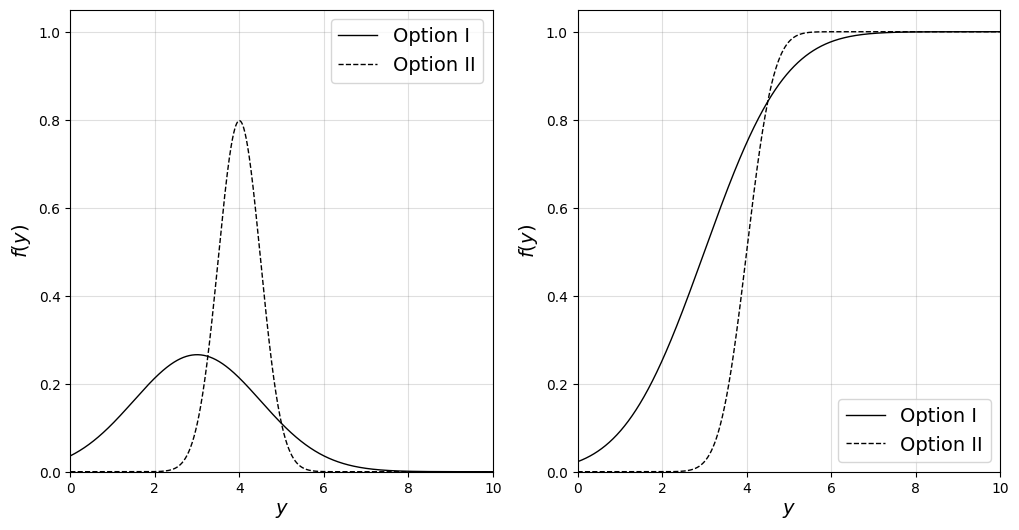

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = ([12, 6]))
ax1.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax1.set_axisbelow(True)
ax1.set_xlabel(r'$y$', fontsize = 14)
ax1.set_ylabel(r'$f(y)$',fontsize = 14)
ax1.tick_params(axis = 'both', which = 'major')
ax1.plot(x, norm.pdf(x, loc = 3, scale = 1.5), 'k-', linewidth = 1, label = 'Option I')
ax1.plot(x, norm.pdf(x, loc = 4, scale = 0.5), 'k--', linewidth = 1, label = 'Option II' )
ax1.legend(loc = 'upper right', fontsize = 14)
ax1.set_xlim(x[0], x[-1])
ax1.set_ylim(0, 1.05)

ax2.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax2.set_axisbelow(True)
ax2.set_xlabel(r'$y$', fontsize = 14)
ax2.set_ylabel(r'$f(y)$',fontsize = 14)
ax2.tick_params(axis = 'both', which = 'major')
ax2.plot(x, norm.cdf(x, loc = 3, scale = 1.5), 'k-', linewidth = 1, label = 'Option I')
ax2.plot(x, norm.cdf(x, loc = 4, scale = 0.5), 'k--', linewidth = 1, label = 'Option II' )
ax2.legend(loc = 'lower right', fontsize = 14)
ax2.set_xlim(x[0], x[-1])
ax2.set_ylim(0, 1.05)

In [25]:
# summarizing statistics
y = 5
ploss1 = norm.sf(y, 3, 1.5)
ploss2 = norm.sf(y, 4, 0.5)

print("Ploss1:", ploss1)
print("Ploss2:", ploss2)

y = 4;
ploss1 = norm.sf(y, 3, 1.5)
ploss2 = norm.sf(y, 4, 0.5)

print("Ploss1:", ploss1)
print("Ploss2:", ploss2)

alpha = 0.9
Q1 = norm.ppf(alpha, 3, 1.5)
Q2 = norm.ppf(alpha, 4, 0.5)

print("Q1:", Q1)
print("Q2:", Q2)

N = 1000
X1 = np.random.normal(3, 1.5, N)
X2 = np.random.normal(4, 0.5, N)

# Compute CVaR using conditional mean
loc1 = X1 >= Q1
CVaR1 = np.mean(X1[loc1])

loc2 = X2 >= Q2
CVaR2 = np.mean(X2[loc2])

print("CVaR1:", CVaR1)
print("CVaR2:", CVaR2)

# Alternative way to compute CVAR
S1 = 0
S2 = 0
for k in range(N):
    S1 = S1 + Q1 + (1 / (1 - alpha)) * max(X1[k] - Q1, 0)
    S2 = S2 + Q2 + (1 / (1 - alpha)) * max(X2[k] - Q2, 0)

CVaR1_alt = S1 / N
CVaR2_alt = S2 / N


print("CVaR1 (alternative):", CVaR1_alt)
print("CVaR2 (alternative):", CVaR2_alt)

Ploss1: 0.09121121972586788
Ploss2: 0.022750131948179195
Ploss1: 0.2524925375469229
Ploss2: 0.5
Q1: 4.922327348316901
Q2: 4.6407757827723
CVaR1: 5.675451235985618
CVaR2: 4.883258334487434
CVaR1 (alternative): 5.7055761914922325
CVaR2 (alternative): 4.878408683453117


4.922327348316901
4.6407757827723
